# Guided and Leaky modes of slab waveguide

Simple 3 layer structure: cladding-core-cladding.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.optimize import newton
from IPython.display import Video
plt.style.use('dark_background')
%matplotlib widget


In [2]:
A = SlabExact(symmetric=True, ns=[1.2, 1.8, 1.2])

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

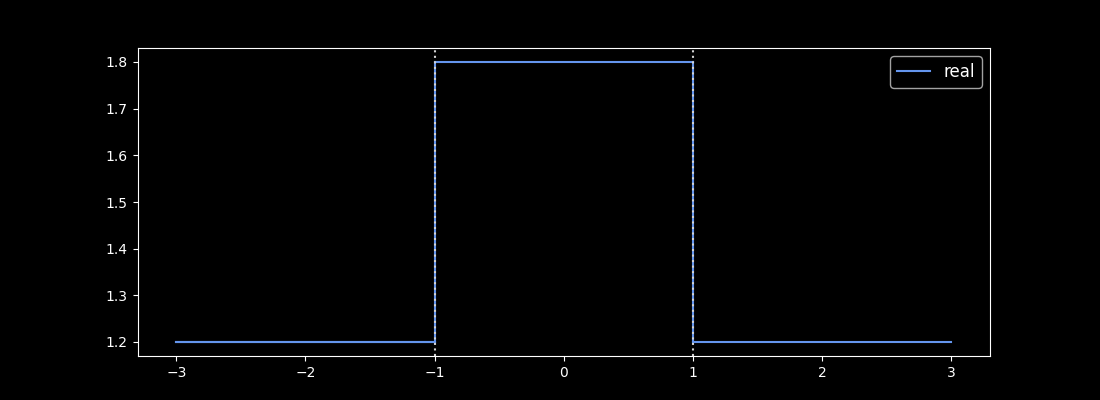

In [3]:
A.plot_refractive_index()

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

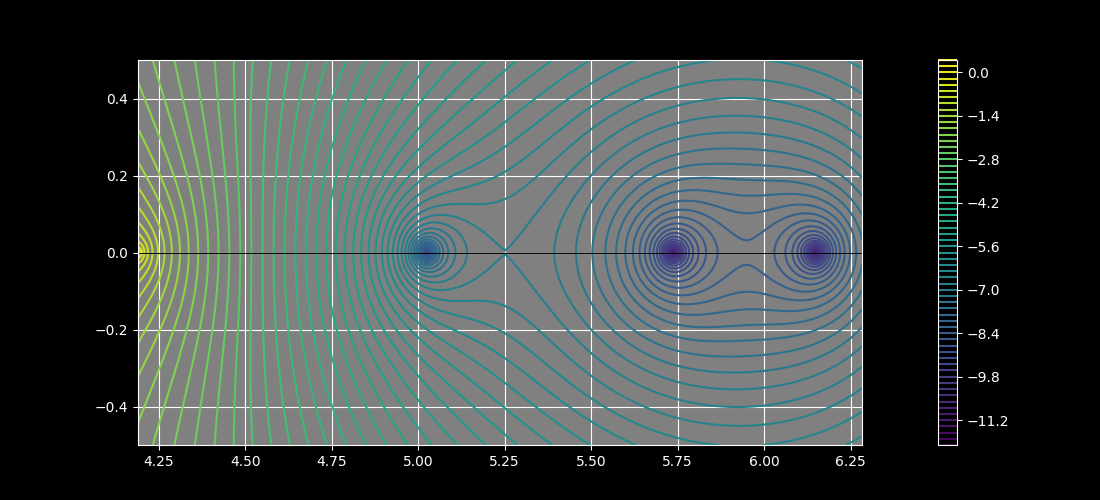

In [4]:
ft = 'TE'
mt = 'guided'

A.determinant_plot(A.K_low, A.K_high, -.5, .5, plane='Beta', field_type=ft,
                  mode_type=mt)

In [7]:
A.determinant?

Signature:
A.determinant(
    C,
    mode_type='guided',
    plane='Z',
    field_type='TE',
    Normalizer=None,
    sign=1,
    direction='LR',
)
Docstring:
Eigenvalue function (formerly determinant of matching matrix, hence
nomenclature).
File:      ~/local/slab/slab.py
Type:      method

In [8]:
args = ('guided', 'Beta', 'TM')

Beta1 = newton(A.determinant, 6.4, args=args)
Beta2 = newton(A.determinant, 5.5, args=args)

args = ('guided', 'Beta', 'TE')

Beta3 = newton(A.determinant, 6.2, args=args)
Beta4 = newton(A.determinant, 5.75, args=args)

Beta1, Beta2, Beta3, Beta4

(array([6.1184553-4.38412264e-18j]),
 array([5.61559577+2.71247327e-17j]),
 array([6.14903651+8.62978923e-17j]),
 array([5.73685774+3.44501354e-17j]))

In [9]:
Fs1 = A.fields(Beta1, field_type='TM', mode_type=mt, plane='Beta')
Fs2 = A.fields(Beta2, field_type='TM', mode_type=mt, plane='Beta')

Fs3 = A.fields(Beta3, field_type='TE', mode_type=mt, plane='Beta')
Fs4 = A.fields(Beta4, field_type='TE', mode_type=mt, plane='Beta')

In [10]:
xs = np.linspace(-5, 5, 1000)

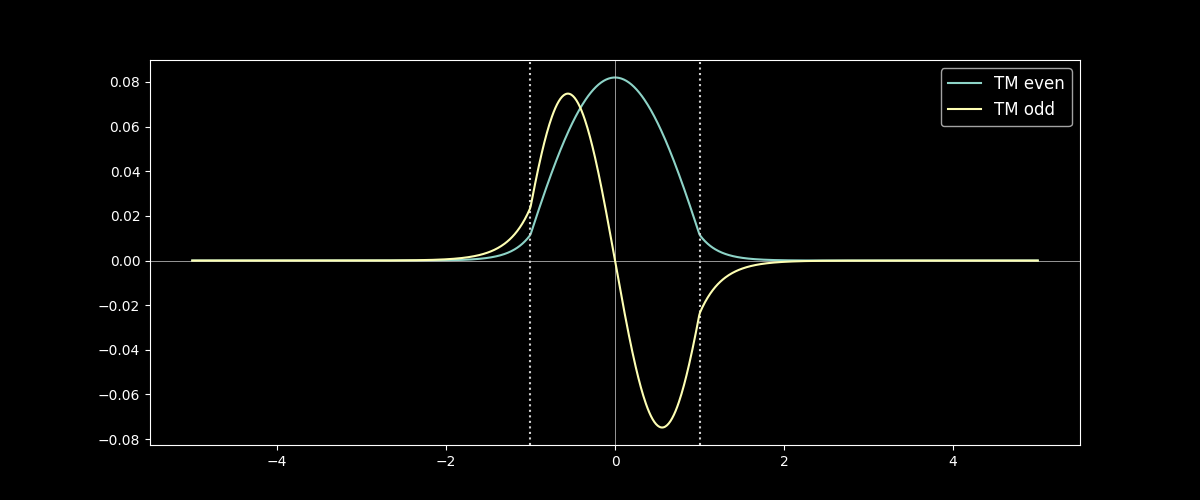

In [11]:
A.plot_field_1d(Fs1, xs=xs, label='TM even')
A.add_1d_plot(Fs2, xs=xs, label='TM odd')

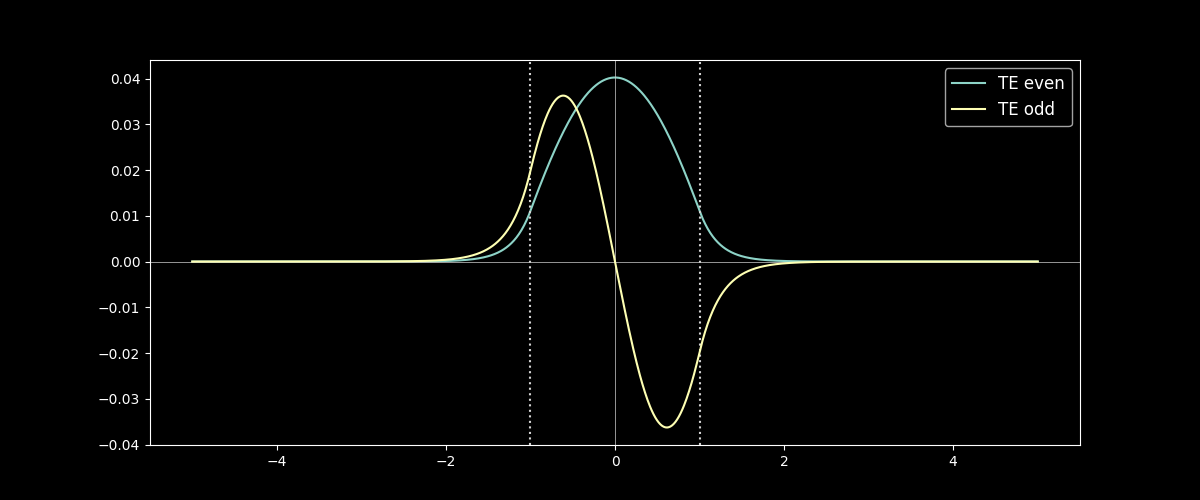

In [19]:
A.plot_field_1d(Fs3, xs=xs, label='TE even')
A.add_1d_plot(Fs4, xs=xs, label='TE odd')

## Tan intersection plotting

In [16]:
V2 = A.K_high**2 - A.K_low**2
K = np.linspace(0.001, 7, 10000)
G = np.sqrt(V2 - K**2, dtype=complex)
d = np.round(A.Rhos[2])
msk = np.where(np.abs(K)<np.sqrt(V2))[0]

/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


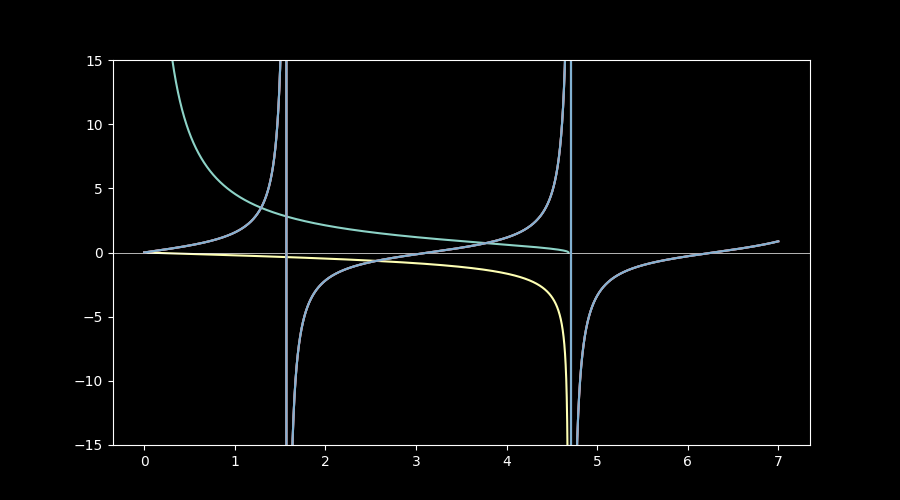

In [17]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(K[msk], G[msk]/K[msk]);
ax.plot(K[msk], -K[msk]/G[msk]);
ax.axhline(0, lw=.5)
for i in range(3):
    ax.plot(K, np.tan(d*K));

ax.set_ylim(-15,15);

### 1-D animations

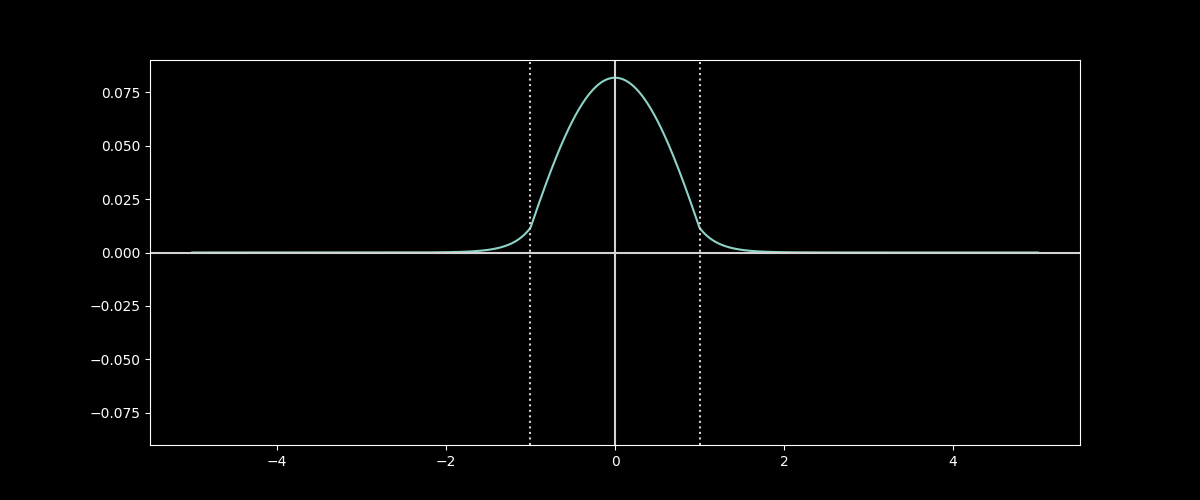

In [13]:
# A.animate_field_1d(Fs1, 'videos/odd_guided', color='C0', lw=1.5, xs=xs)

In [15]:
Video('videos/odd_guided'+'.mp4', html_attributes="controls loop")


## 2D plots

(<Figure size 900x750 with 2 Axes>, <Axes: >)

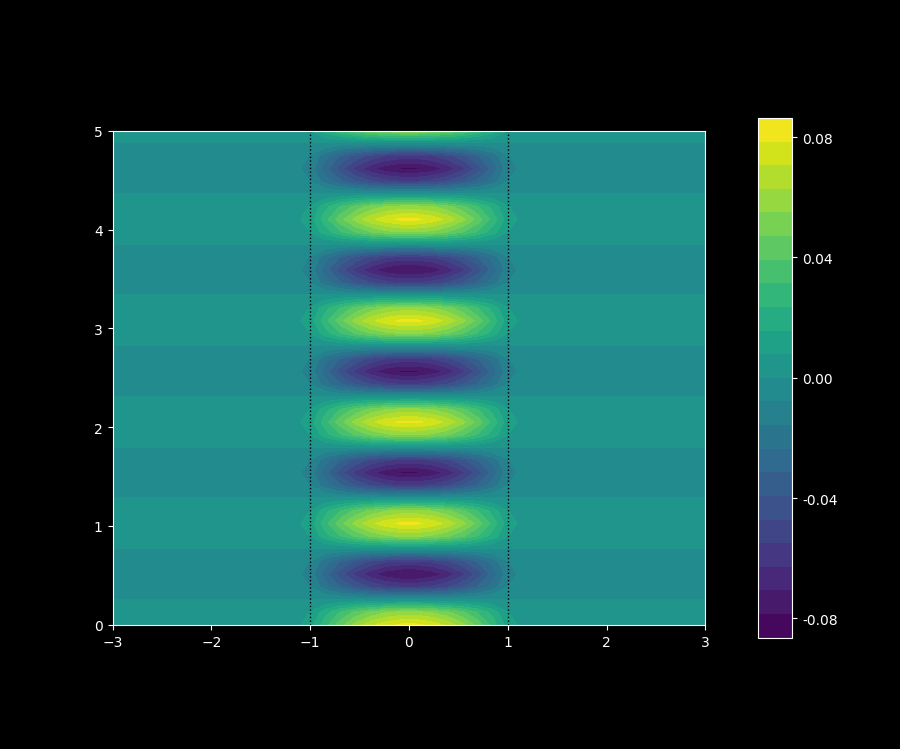

In [16]:
A.plot_field_2d(Fs1, xs=np.linspace(-3,3,40), zmax=5, zref=40, levels=20)

## 2D animations

In [17]:
# A.animate_field_2d(Fs1, 'videos/2d_odd_guided')

In [18]:
Video('videos/2d_odd_guided'+'.mp4', html_attributes="controls loop")


# Leaky Modes

In [19]:
field_type = 'TE'
mode_type = 'leaky'

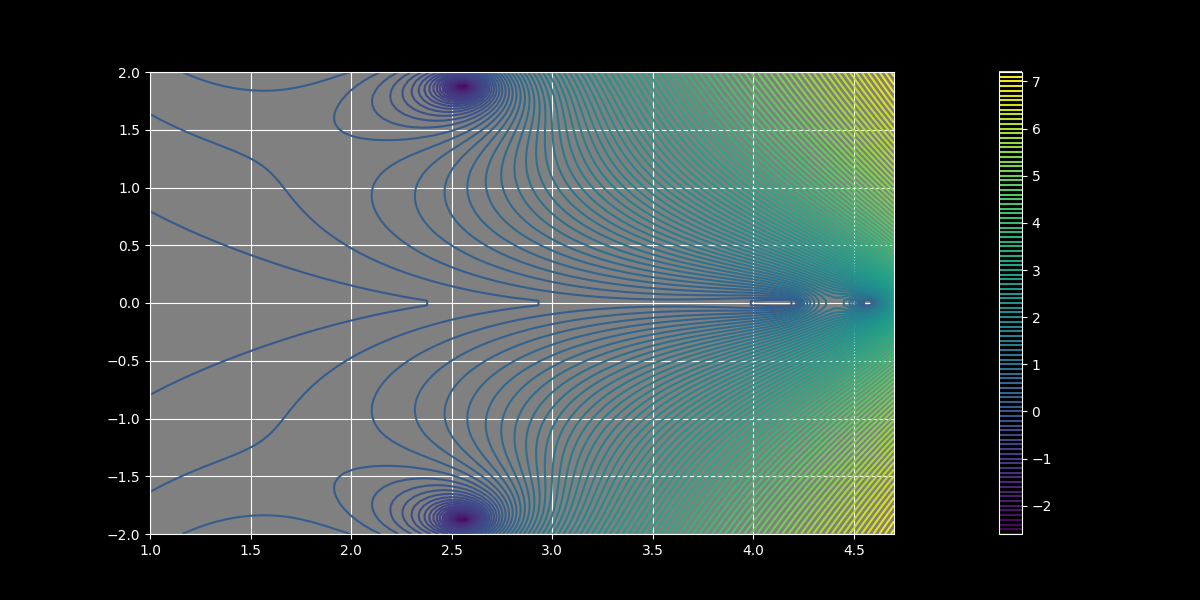

In [31]:
plotlogf(A.determinant, 1., 4.7, -2, 2, fargs=(field_type, mode_type), iref=100, rref=100,levels=100)

In [35]:
beta2 = newton(A.determinant, np.array([2.5-2j]), args=(field_type, mode_type))[0]
beta2

(2.5551525240449533-1.872907925032009j)

In [36]:
Fs2 = A.fields(beta2, field_type=field_type, mode_type=mode_type)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

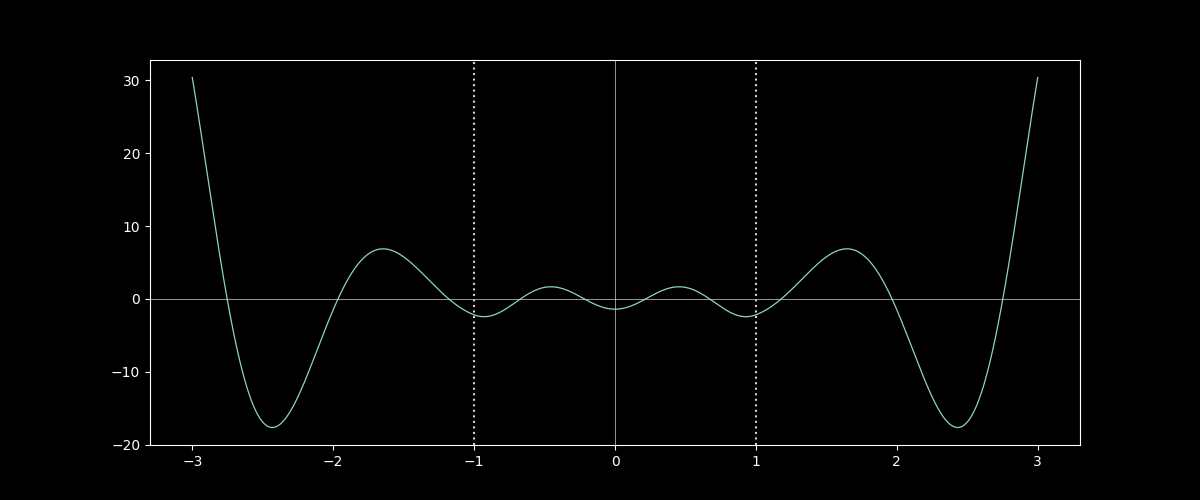

In [37]:
A.plot_field_1d(Fs2, plot_axis=True, linewidth=.9)

In [24]:
beta3 = newton(A.determinant, np.array([3.4-1.5j]), args=(field_type, mode_type))[0]
beta3

(-1.7477823373277852+0.4440979615460099j)

# Does M00 give both leaky and guided modes?

They say M00 also gives eigenequation for leaky modes... but it can't with our choice of branch...

In [ ]:
indices=[0,0]
Zl = 'standard'
Zr = 'standard'

In [ ]:
plotlogf(A.determinant, 0,  A.K_high, -2, 2, field_type, mode_type, indices, Zl, Zr, iref=100, rref=100,levels=100)